You are given an integer c representing c power stations, each with a unique identifier id from 1 to c (1‑based indexing).

These stations are interconnected via n bidirectional cables, represented by a 2D array connections, where each element connections[i] = [ui, vi] indicates a connection between station ui and station vi. Stations that are directly or indirectly connected form a power grid.

Initially, all stations are online (operational).

You are also given a 2D array queries, where each query is one of the following two types:

    [1, x]: A maintenance check is requested for station x. If station x is online, it resolves the check by itself. If station x is offline, the check is resolved by the operational station with the smallest id in the same power grid as x. If no operational station exists in that grid, return -1.

    [2, x]: Station x goes offline (i.e., it becomes non-operational).

Return an array of integers representing the results of each query of type [1, x] in the order they appear.

Note: The power grid preserves its structure; an offline (non‑operational) node remains part of its grid and taking it offline does not alter connectivity.

 

Example 1:

Input: c = 5, connections = [[1,2],[2,3],[3,4],[4,5]], queries = [[1,3],[2,1],[1,1],[2,2],[1,2]]

Output: [3,2,3]

Explanation:

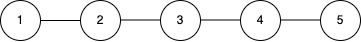

    Initially, all stations {1, 2, 3, 4, 5} are online and form a single power grid.
    Query [1,3]: Station 3 is online, so the maintenance check is resolved by station 3.
    Query [2,1]: Station 1 goes offline. The remaining online stations are {2, 3, 4, 5}.
    Query [1,1]: Station 1 is offline, so the check is resolved by the operational station with the smallest id among {2, 3, 4, 5}, which is station 2.
    Query [2,2]: Station 2 goes offline. The remaining online stations are {3, 4, 5}.
    Query [1,2]: Station 2 is offline, so the check is resolved by the operational station with the smallest id among {3, 4, 5}, which is station 3.

Example 2:

Input: c = 3, connections = [], queries = [[1,1],[2,1],[1,1]]

Output: [1,-1]

Explanation:

    There are no connections, so each station is its own isolated grid.
    Query [1,1]: Station 1 is online in its isolated grid, so the maintenance check is resolved by station 1.
    Query [2,1]: Station 1 goes offline.
    Query [1,1]: Station 1 is offline and there are no other stations in its grid, so the result is -1.

 

Constraints:

    1 <= c <= 105
    0 <= n == connections.length <= min(105, c * (c - 1) / 2)
    connections[i].length == 2
    1 <= ui, vi <= c
    ui != vi
    1 <= queries.length <= 2 * 105
    queries[i].length == 2
    queries[i][0] is either 1 or 2.
    1 <= queries[i][1] <= c

 

In [ ]:
from sortedcontainers import SortedList


class UF:
    def __init__(self, nodes):
        self.parents = {node: node for node in nodes}
        self.degree = {node: 1 for node in nodes}

    def find(self, node):
        if self.parents[node] == node:
            return node
        else:
            return self.find(self.parents[node])

    def union(self, x, y):
        px = self.find(x)
        py = self.find(y)
        if px != py:
            if self.degree[px] > self.degree[py]:
                self.degree[px] += 1
                self.parents[py] = px
            else:
                self.degree[py] += 1
                self.parents[px] = py

class Solution:
    def processQueries(self, c: int, connections: List[List[int]], queries: List[List[int]]) -> List[int]:
        nodes = range(1, c + 1)
        online_nodes = set(nodes)  # fast check
        uf = UF(nodes)
        for x, y in connections:
            uf.union(x, y)
        
        comp_node = defaultdict(SortedList)  # only online
        for node in nodes:
            comp_node[uf.find(node)].add(node)

        ans = []
        for op, node in queries:
            if op == 1:
                if node in online_nodes:
                    ans.append(node)
                else:
                    if comp_node[uf.find(node)]:
                        ans.append(comp_node[uf.find(node)][0])
                    else:
                        ans.append(-1)
            else:
                if node in online_nodes:
                    online_nodes.remove(node)
                    comp_node[uf.find(node)].remove(node)
        return ans

In [ ]:
from sortedcontainers import SortedList


class UF:
    def __init__(self, nodes):
        self.parents = {node: node for node in nodes}

    def find(self, node):
        if self.parents[node] != node:
            self.parents[node] = self.find(self.parents[node])
        return self.parents[node]

    def union(self, x, y):
        self.parents[self.find(y)] = self.find(x)

class Solution:
    def processQueries(self, c: int, connections: List[List[int]], queries: List[List[int]]) -> List[int]:
        nodes = range(1, c + 1)
        online_nodes = set(nodes)  # fast check
        uf = UF(nodes)
        for x, y in connections:
            uf.union(x, y)
        
        comp_node = defaultdict(SortedList)  # only online
        for node in nodes:
            comp_node[uf.find(node)].add(node)

        ans = []
        for op, node in queries:
            if op == 1:
                if node in online_nodes:
                    ans.append(node)
                else:
                    if comp_node[uf.find(node)]:
                        ans.append(comp_node[uf.find(node)][0])
                    else:
                        ans.append(-1)
            else:
                if node in online_nodes:
                    online_nodes.remove(node)
                    comp_node[uf.find(node)].remove(node)
        return ans